# 1 - analyse exploratoire des données (non cleané)
---

**Schéma de la base de données Olist**

![Data schema](https://i.imgur.com/HRhd2Y0.png)

**Imports des données**

In [1]:
import datetime as dt
import numpy as np
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_customers = pd.read_csv("data/olist_customers_dataset.csv")
df_geolocalisation = pd.read_csv("data/olist_geolocation_dataset.csv")
df_order_items = pd.read_csv("data/olist_order_items_dataset.csv")
df_order_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("data/olist_orders_dataset.csv")
df_products = pd.read_csv("data/olist_products_dataset.csv")
df_sellers = pd.read_csv("data/olist_sellers_dataset.csv")
df_translation = pd.read_csv("data/product_category_name_translation.csv")

**import fonctions pour exploration**

In [2]:
from math import ceil, sqrt, floor, pow


# Retourne un nombre x  de couleurs avec un espacement homogene contenus dans une colormap
def get_colors_from_listedcolormap(colormap, x):
    colors = []
    for i in range(0, x):
        if x < 2:
            y = 1
        else:
            y = i / (x - 1)
        colors.append(COLORMAP.colors[floor((COLORMAP.N - 1) * y)])
    return colors


# Retourne l'ensemble des labels du dataframe pour un certain dtype
def get_set_of_labels(dataframe, dtype):
    return {index for index, value in dataframe.dtypes.items() if value == dtype}


# Genere une grille carrée d'histogramme pour chaque variables de type dtype
def plot_sghisto(dataframe, dtype, color="", max_items=100, labels=[], title=""):
    if not labels:
        if dtype == "all":
            labels = dataframe.columns.values
        elif dtype == "numbers":
            labels = get_set_of_labels(dataframe, "float64")
            labels = labels.union(get_set_of_labels(dataframe, "int64"))
        else:
            labels = get_set_of_labels(dataframe, dtype)

    labels_length = len(labels)
    dimension = ceil(sqrt(labels_length))
    dimension2 = int(pow(dimension, 2))
    fig, axs = plt.subplots(dimension, dimension, figsize=(30, 30))
    fig.suptitle(title, fontsize=32, x=0.5, y=0.95)

    for i, value in enumerate(labels, start=0):
        x = floor(i / dimension)
        y = i - x * dimension
        if dataframe[value].dtype == "object":
            df_index = dataframe[value].value_counts().index[:max_items]
            df_temp = dataframe[dataframe[value].isin(df_index.values)]
            sns.histplot(
                data=df_temp, x=value, color=color, discrete=True, ax=axs[x, y]
            )
            ax = axs[x, y]
            ax.set_xticklabels([])
        if dataframe[value].dtype == "float64" or dataframe[value].dtype == "int64":
            sns.histplot(data=dataframe, x=value, color=color, ax=axs[x, y])
        ax = axs[x, y]
        ax.set_xlabel(f"{value[0:15]}", fontdict={"fontsize": 18})
        ax.set_ylabel("")

    if dimension2 > labels_length:
        for i in range(labels_length, dimension2):
            x = floor(i / dimension)
            y = i - x * dimension
            axs[x, y].remove()


# Mes couleurs
COLORMAP = sns.color_palette("plasma", as_cmap=True)
COLORS = get_colors_from_listedcolormap(COLORMAP, 5)
COLOR_PRIMARY = COLORS[0]
COLOR_SECONDARY = COLORS[1]
COLOR_TERTIARY = COLORS[4]
COLOR_QUATERNARY = COLORS[2]
COLOR_QUINARY = COLORS[3]

**Parametres divers**

In [3]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_colwidth", 100)
pd.set_option("precision", 3)

**Observer les données**

In [4]:
df_customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
46673,3a0ecfe52b994b2589fb52ced98d8166,94c2f59eee91ed7c2ad08b0766c49b87,95080,caxias do sul,RS
18193,618b8a8069f55d05ad5f1ccc488afa5e,689769aefadcc56d72a8b76866387dad,71917,brasilia,DF
7153,7b9cd81f72142c9bb51ad110f4fb3b08,8725487bfe51837080dd0887c7249db2,95555,capao da canoa,RS
2452,67372e0bce729cebb559886b6c4d9e2e,c9fff85f2617b8e1a78142aa11ee962f,16057,aracatuba,SP
76145,80fce2f155c56d38186ae276a2280006,a854d3a1f68d104777314631772349f4,35164,ipatinga,MG


In [5]:
df_geolocalisation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
735038,59075,-5.825,-35.211,natal,RN
161083,6440,-23.513,-46.860,barueri,SP
418496,20745,-22.904,-43.307,rio de janeiro,RJ
286875,13092,-22.889,-47.022,campinas,SP
287331,13070,-22.902,-47.078,campinas,SP


In [6]:
df_order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
52806,782c3666584e68ee1fe25859e30cfbe8,2,6d33559681ad82d2e835b1cb587d2ce3,0bae85eb84b9fb3bd773911e89288d54,2017-08-01 16:15:21,35.12,16.11
55658,7e8a488126f108bf5841a1bc1dd2c762,1,cb3837fe99e4b92c4082faf8fb6f75ba,4e922959ae960d389249c378d1c939f5,2017-11-30 20:53:42,69.00,15.23
44873,660cb47a0b4b671c86901a47f7dbc91c,1,052413504e5295cd66ec4ced0b310062,4869f7a5dfa277a7dca6462dcf3b52b2,2018-03-16 14:15:40,179.00,19.13
76265,ada8c993c9ef5f3e6705c9ea4af1a1d9,1,530989bc6eff4420c49a84214ab1eb51,eebb3372362aa9a46975164bed19a7e7,2017-04-28 13:50:22,73.99,8.89
72468,a5477627582780f6c347026e9c8ae0eb,1,bce474cc95b6e77657e10939b0b4248c,7d13fca15225358621be4086e1eb0964,2018-08-21 15:04:53,146.00,12.08


In [7]:
df_order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
9788,b1629139e38e77931c032720fff0c091,1,boleto,1,27.68
59801,dde5f036dff77c8687173aee04967268,1,credit_card,1,35.42
37201,77f786b616f184da30df78a7eb228d92,1,credit_card,1,27.30
99315,65a6146689b83878d498e1a7d03782c7,1,credit_card,4,86.73
49003,4e78772384a49c0cb9ec6c49530a98de,1,credit_card,1,76.87


In [8]:
df_order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
38201,73b02ff4a93202520d38e5e20cb5859b,1f4c55439dfb0750759521284d322815,2,NaN,"Tanque de água não tem uma trava quando é posto sobre a base do umidificador, fica solto, vem co...",2017-10-14 00:00:00,2017-10-15 02:25:44
87911,fbfa6533e7d2680ba2c2e049b7ef8c0d,179b63fcfafb80e064370a2ce74c81f7,1,NaN,NaN,2018-05-23 00:00:00,2018-05-23 04:47:31
48202,b3d3d88e3cecc9a365dfbff200af0e9f,1a07bcd88f815b8098a7e112b3995323,3,NaN,NaN,2018-04-24 00:00:00,2018-04-25 17:41:38
99773,11fcd0e723918cabcf2c2cbe4a8600d7,c1a5798b5aeecb07fef65a224caab385,5,NaN,NaN,2018-02-07 00:00:00,2018-02-09 10:47:42
92279,7b29166bc121bff6d9ea06c44f6d7387,155220928b39545388340a30c2055907,5,NaN,NaN,2018-03-29 00:00:00,2018-03-29 15:51:53


In [9]:
# Plusieurs notes pour la même commande
df_order_reviews[df_order_reviews["order_id"] == "03c939fd7fd3b38f8485a0f95798f1f6"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8329,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,"Um ponto negativo que achei foi a cobrança de 3 taxas de entregas, sendo que comprei os 3 produt...",2018-03-20 00:00:00,2018-03-21 02:28:23
51931,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,NaN,NaN,2018-03-29 00:00:00,2018-03-30 00:29:09
70005,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Seria ótimo se tivesem entregue os 3 (três) pedidos de uma única vez.,2018-03-06 00:00:00,2018-03-06 19:50:32


In [10]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46863,91e1117f4e261dce48c8dbc09d8f2d2e,8835b132f4072ae00a43842d4259f4bf,delivered,2017-10-03 13:02:29,2017-10-03 13:14:15,2017-10-11 16:57:42,2017-10-30 21:12:53,2017-11-01 00:00:00
44258,5a39aece773a0e78a17451bff3221669,cfbab1d1ea176ef344000d4a6dddf436,delivered,2018-04-04 09:43:44,2018-04-04 09:55:18,2018-04-05 00:14:41,2018-04-09 22:06:55,2018-04-16 00:00:00
1475,710770cfb61b2c43a091ab2c7b89a921,f3df91219ffe2fb3e399377acfd0e527,delivered,2018-01-06 14:25:01,2018-01-06 14:34:11,2018-01-08 21:49:48,2018-01-16 17:51:36,2018-02-02 00:00:00
86946,4a0b592d4d6082de8155698ca49c6345,e1b1416cc9565ebdb336ddaf12fd9229,delivered,2018-07-23 16:39:54,2018-07-24 08:31:39,2018-07-24 10:21:00,2018-07-26 17:11:42,2018-07-31 00:00:00
26056,505bb60c12a248aa8c995503ec264554,8b718fe1aa1275c0f776af5b39001309,delivered,2018-08-07 20:16:13,2018-08-08 20:10:21,2018-08-09 13:21:00,2018-08-20 17:42:39,2018-09-11 00:00:00


In [11]:
df_products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
11013,cfd2499557fab719688fc5260eb18dad,telefonia,60.0,791.0,4.0,250.0,17.0,4.0,12.0
9221,505005df95180728667b709c27783732,moveis_escritorio,38.0,2264.0,1.0,11400.0,58.0,35.0,58.0
2082,5afcae10f25795d55b858f6a2b95233b,brinquedos,36.0,509.0,1.0,800.0,40.0,10.0,40.0
26117,569962b1062cbaf02b768a3fe810fdd3,esporte_lazer,25.0,211.0,1.0,850.0,51.0,18.0,11.0
3695,2a1dc7b4d777085804b1a6389639870c,eletrodomesticos,59.0,302.0,1.0,500.0,20.0,13.0,15.0


In [12]:
df_sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
135,82e0a475a88cc9595229d8029273f045,3417,sao paulo,SP
2497,c394e193cda3b4225ff2094d32184849,4104,sao paulo,SP
840,3606774ec64634822d78dc2db6d37045,9510,sao caetano do sul,SP
2444,96804ea39d96eb908e7c3afdb671bb9e,38950,ibia,MG
2087,6c6cc59a5c00cacc5054ca06d65cc282,97110,santa maria,RS


In [13]:
df_translation.sample(5)

,product_category_name,product_category_name_english
48,livros_interesse_geral,books_general_interest
34,artigos_de_festas,party_supplies
60,la_cuisine,la_cuisine
8,telefonia,telephony
14,brinquedos,toys


**Création d'un dictionnaire contenant les dataframes**

In [14]:
names_dataframes = [
    "df_customers",
    "df_geolocalisation",
    "df_order_items",
    "df_order_payments",
    "df_order_reviews",
    "df_orders",
    "df_products",
    "df_sellers",
    "df_translation",
]

dict_dataframes = {name: eval(name) for name in names_dataframes}

**Informations sur l'ensemble des dataframes**

In [15]:
def info(dict_dataframes):
    df_info = pd.DataFrame({})
    df_info["dataframe"] = [k for k in dict_dataframes.keys()]
    df_info["n_rows"] = [v.shape[0] for v in dict_dataframes.values()]
    df_info["n_cols"] = [v.shape[1] for v in dict_dataframes.values()]
    df_info["null_amount"] = [v.isnull().sum().sum() for v in dict_dataframes.values()]
    df_info["qty_null_columns"] = [
        len([col for col, null in v.isnull().sum().items() if null > 0])
        for v in dict_dataframes.values()
    ]
    df_info["null_columns"] = [
        ", ".join([col for col, null in v.isnull().sum().items() if null > 0])
        for v in dict_dataframes.values()
    ]

    return df_info

In [16]:
info(dict_dataframes)

,dataframe,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,df_customers,99441,5,0,0,
1,df_geolocalisation,1000163,5,0,0,
2,df_order_items,112650,7,0,0,
3,df_order_payments,103886,5,0,0,
4,df_order_reviews,100000,7,146532,2,"review_comment_title, review_comment_message"
5,df_orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,df_products,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, prod..."
7,df_sellers,3095,4,0,0,
8,df_translation,71,2,0,0,


**Identifier les valeurs manquantes pour chaques dataframes**

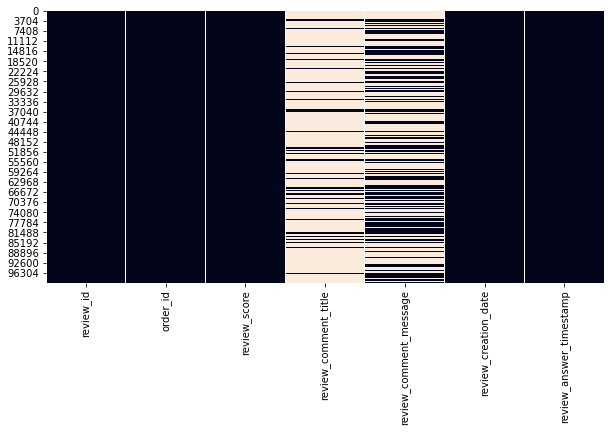

In [17]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_order_reviews.isna(), cbar=False)
plt.show()

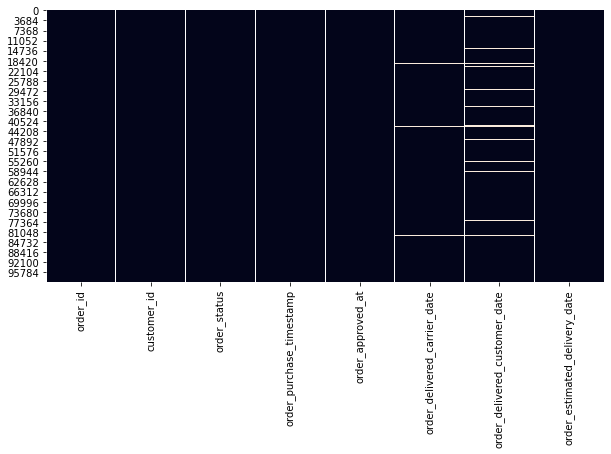

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_orders.isna(), cbar=False)
plt.show()

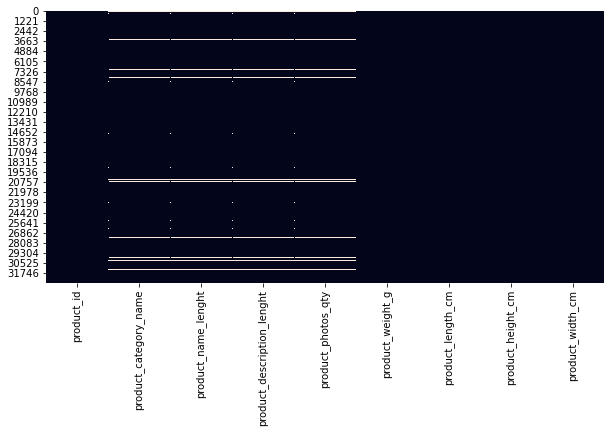

In [19]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_products.isna(), cbar=False)
plt.show()

**Informations sur toutes les colonnes des dataframes**

In [20]:
def overview(name, dataframe):
    df_overview = pd.DataFrame({})

    df_overview["dataframe"] = [name for col in dataframe.columns]
    df_overview["column"] = [col for col in dataframe.columns]
    df_overview["qty_null_column"] = [
        dataframe[col].isna().sum() for col in dataframe.columns
    ]
    df_overview["percent_null"] = (
        df_overview["qty_null_column"] / dataframe.shape[0] * 100.00
    )
    df_overview["dtype"] = [dtype for dtype in dataframe.dtypes]
    df_overview["qty_category_unique"] = [
        len(dataframe[col].value_counts()) for col in dataframe.columns
    ]

    return df_overview

In [21]:
def overview_dict(dict_dataframes):
    df_overview_agg = pd.DataFrame({})

    for name, df in dict_dataframes.items():
        df_overview_agg = df_overview_agg.append(overview(name, df), ignore_index=True)

    return df_overview_agg

In [22]:
overview_dict(dict_dataframes)

,dataframe,column,qty_null_column,percent_null,dtype,qty_category_unique
0,df_customers,customer_id,0,0.0,object,99441
1,df_customers,customer_unique_id,0,0.0,object,96096
2,df_customers,customer_zip_code_prefix,0,0.0,int64,14994
3,df_customers,customer_city,0,0.0,object,4119
4,df_customers,customer_state,0,0.0,object,27
...,...,...,...,...,...,...
47,df_sellers,seller_zip_code_prefix,0,0.0,int64,2246
48,df_sellers,seller_city,0,0.0,object,611
49,df_sellers,seller_state,0,0.0,object,23
50,df_translation,product_category_name,0,0.0,object,71


**Gestion des doublons**

In [23]:
for name, df in dict_dataframes.items():
    print(name, " : ", df.duplicated().sum())

df_customers  :  0
df_geolocalisation  :  261831
df_order_items  :  0
df_order_payments  :  0
df_order_reviews  :  0
df_orders  :  0
df_products  :  0
df_sellers  :  0
df_translation  :  0


In [24]:
df_geolocalisation.drop_duplicates(inplace=True)

**Gestion des valeurs manquantes**

In [25]:
df_order_reviews["review_comment_title"].fillna(" ", inplace=True)
df_order_reviews["review_comment_message"].fillna(" ", inplace=True)

df_orders["order_approved_at"].fillna(0, inplace=True)
df_orders["order_delivered_carrier_date"].fillna(0, inplace=True)
df_orders["order_delivered_customer_date"].fillna(0, inplace=True)

df_products["product_category_name"].fillna("desconhecido", inplace=True)
df_products["product_name_lenght"].fillna(0, inplace=True)
df_products["product_description_lenght"].fillna(0, inplace=True)
df_products["product_photos_qty"].fillna(0, inplace=True)
df_products["product_weight_g"].fillna(0, inplace=True)
df_products["product_length_cm"].fillna(0, inplace=True)
df_products["product_height_cm"].fillna(0, inplace=True)
df_products["product_width_cm"].fillna(0, inplace=True)

**Ajout de valeur pour translation de catégories**

In [26]:
row_1 = dict(
    product_category_name="desconhecido", product_category_name_english="unknown"
)
row_2 = dict(
    product_category_name="portateis_cozinha_e_preparadores_de_alimentos",
    product_category_name_english="small_appliances",
)
row_3 = dict(product_category_name="pc_gamer", product_category_name_english="pc_gamer")
df_translation = df_translation.append([row_1, row_2, row_3], ignore_index=True)

**Gestion des types / Convertir les timestamps**

In [27]:
columns_orders_ts = [
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_estimated_delivery_date",
]
for col in columns_orders_ts:
    df_orders[col] = pd.to_datetime(df_orders[col], errors="coerce")

In [28]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
47455,a9fa8567c21a5f8e4450af02a87f26cb,a1af950930516005763b142d147b079b,delivered,2017-07-29 20:27:08,2017-07-29 20:43:35,2017-07-31 17:43:36,2017-08-17 15:48:16,2017-08-23
20635,b0247f256d2486d4cb5f3bf93dd84eb4,30c6c7a5f5570eea755284d1775568b8,delivered,2018-05-27 16:42:04,2018-05-29 03:14:46,2018-06-08 10:24:00,2018-06-20 13:28:42,2018-07-26
49330,de0118eda0bf4900eee8cb706027f55a,296a45f462a9595ea86c29dcc3e23e1c,delivered,2018-04-25 15:35:15,2018-04-25 16:33:49,2018-04-30 07:18:00,2018-05-02 17:26:44,2018-05-10
30472,2cedb157302d27f18d5648e77f92d56d,6efd038b1c60be0ab8d554e9b488a40d,delivered,2018-06-18 20:56:17,2018-06-18 21:17:51,2018-06-19 14:04:00,2018-06-28 19:08:41,2018-08-01
36580,65b8cbd6d0ad97befea844cc40817ccb,220a1f1adf2be499250db06cd27d0a1e,delivered,2017-05-10 16:48:50,2017-05-10 17:02:49,2017-05-16 08:54:14,2017-05-22 20:26:17,2017-06-02


**Verification valeurs manquantes et types**

In [29]:
overview_dict(dict_dataframes)

,dataframe,column,qty_null_column,percent_null,dtype,qty_category_unique
0,df_customers,customer_id,0,0.0,object,99441
1,df_customers,customer_unique_id,0,0.0,object,96096
2,df_customers,customer_zip_code_prefix,0,0.0,int64,14994
3,df_customers,customer_city,0,0.0,object,4119
4,df_customers,customer_state,0,0.0,object,27
...,...,...,...,...,...,...
47,df_sellers,seller_zip_code_prefix,0,0.0,int64,2246
48,df_sellers,seller_city,0,0.0,object,611
49,df_sellers,seller_state,0,0.0,object,23
50,df_translation,product_category_name,0,0.0,object,71


### 1) traitement et assemblage pour segmentation RFM - 3 dimensions  

RFM signifie Récence, Fréquence et Monétaire. Il s'agit d'une technique de segmentation des clients qui utilise le comportement d'achat passé pour diviser les clients en groupes.
On va donc s'interesser a :

-df_orders   
-df_order_payments   
-df_customers pour obtenir les id de clients uniques

**copie**

In [ ]:
df_customers_c = df_customers.copy()
df_orders_c = df_orders.copy()
df_order_payments_c = df_order_payments.copy()

**merge df_orders / df_customers**

In [ ]:
df_orders_c = df_orders_c.merge(
    df_customers_c, how="left", left_on="customer_id", right_on="customer_id"
)

In [ ]:
df_orders_c = df_orders_c.drop(
    ["customer_zip_code_prefix", "customer_city", "customer_state"], axis=1
)

**visualisation des distributions**

In [ ]:
plot_sghisto(
    df_orders_c,
    dtype="all",
    title="df_orders : distribution des valeurs quantitatives et qualitatives",
    color=COLOR_SECONDARY,
)

In [ ]:
plot_sghisto(
    df_order_payments_c,
    dtype="all",
    title="df_order_payments : distribution des valeurs quantitatives et qualitatives",
    color=COLOR_PRIMARY,
)

**merge df_orders / df_order_payments**

In [ ]:
df_rfm = df_orders_c.merge(
    df_order_payments_c, how="left", left_on="order_id", right_on="order_id"
)

In [ ]:
df_rfm["order_status"].value_counts()

In [ ]:
df_rfm["order_id"].value_counts()

In [ ]:
df_rfm.sample(10)

**Traitement des ordres sans paiements**

In [ ]:
df_rfm.isna().sum()

In [ ]:
df_rfm.dropna(inplace=True)

**Suppression des ordres non livrés**

In [ ]:
df_rfm = df_rfm.loc[df_rfm["order_status"] == "delivered"]

In [ ]:
df_rfm["order_status"].value_counts()

In [ ]:
df_rfm.shape

**Agrégation des données RFM**

In [ ]:
# now = last date achat client
NOW = dt.datetime(2018, 10, 25)

df_rfm = df_rfm.groupby("customer_unique_id").agg(
    Recency=("order_purchase_timestamp", lambda x: (NOW - x.max()).days),
    Frequency=("order_id", lambda x: len(x)),
    MonetaryValue=("payment_value", "sum"),
)

In [ ]:
df_rfm.sample(10)

In [ ]:
# 94% des clients ne passent qu'un seul ordre
df_rfm.describe(percentiles=[0.94])

**Filtre outliers zscore 3std**

In [ ]:
df_rfm.shape

In [ ]:
# Kmeans sensible outliers, meilleure visualisation en 3d
zscore = stats.zscore(df_rfm["MonetaryValue"])
df_rfm = df_rfm.loc[zscore < 3]

In [ ]:
# Vérification du nombre de lignes supprimées
df_rfm.shape

**Visualisation avant export**

Manifestement il n'y a presque que des clients avec une seule commande, le jeu de données parait anormal ou biaisé

In [ ]:
plot_sghisto(
    df_rfm,
    dtype="all",
    title="df_rfm : distribution des valeurs quantitatives et qualitatives",
    color=COLOR_TERTIARY,
)

In [ ]:
ax = sns.boxplot(x=df_rfm["Frequency"], data=df_rfm)

**Export des données pour segmentation RFM**

In [ ]:
df_rfm.to_csv("data/df_rfm.csv")

### 2) traitement et assemblage pour segmentation avançée - N dimensions

**copie**

In [ ]:
df_customers_c = df_customers.copy()
df_geolocalisation_c = df_geolocalisation.copy()
df_order_items_c = df_order_items.copy()
df_order_payments_c = df_order_payments.copy()
df_order_reviews_c = df_order_reviews.copy()
df_orders_c = df_orders.copy()
df_products_c = df_products.copy()
df_sellers_c = df_sellers.copy()
df_translation_c = df_translation.copy()

**augmentation sur translation par ajout des 4 types de produits**

In [ ]:
mapper_categories_to_four_types = {
    "health_beauty": "convenience",
    "computers_accessories": "shopping",
    "auto": "shopping",
    "bed_bath_table": "shopping",
    "furniture_decor": "shopping",
    "sports_leisure": "shopping",
    "perfumery": "convenience",
    "housewares": "shopping",
    "telephony": "shopping",
    "watches_gifts": "shopping",
    "food_drink": "convenience",
    "baby": "convenience",
    "stationery": "shopping",
    "tablets_printing_image": "shopping",
    "toys": "shopping",
    "fixed_telephony": "shopping",
    "garden_tools": "shopping",
    "fashion_bags_accessories": "shopping",
    "small_appliances": "shopping",
    "consoles_games": "shopping",
    "audio": "shopping",
    "fashion_shoes": "shopping",
    "cool_stuff": "other",
    "luggage_accessories": "shopping",
    "air_conditioning": "shopping",
    "construction_tools_construction": "shopping",
    "kitchen_dining_laundry_garden_furniture": "shopping",
    "costruction_tools_garden": "shopping",
    "fashion_male_clothing": "shopping",
    "pet_shop": "convenience",
    "office_furniture": "shopping",
    "market_place": "specialty",
    "electronics": "shopping",
    "home_appliances": "shopping",
    "party_supplies": "shopping",
    "home_confort": "shopping",
    "costruction_tools_tools": "shopping",
    "agro_industry_and_commerce": "specialty",
    "furniture_mattress_and_upholstery": "shopping",
    "books_technical": "specialty",
    "home_construction": "shopping",
    "musical_instruments": "specialty",
    "furniture_living_room": "shopping",
    "construction_tools_lights": "shopping",
    "industry_commerce_and_business": "specialty",
    "food": "convenience",
    "art": "shopping",
    "furniture_bedroom": "shopping",
    "books_general_interest": "shopping",
    "construction_tools_safety": "shopping",
    "fashion_underwear_beach": "shopping",
    "fashion_sport": "shopping",
    "signaling_and_security": "specialty",
    "computers": "shopping",
    "christmas_supplies": "shopping",
    "fashio_female_clothing": "shopping",
    "home_appliances_2": "shopping",
    "books_imported": "shopping",
    "drinks": "convenience",
    "cine_photo": "shopping",
    "la_cuisine": "shopping",
    "music": "shopping",
    "home_comfort_2": "shopping",
    "small_appliances_home_oven_and_coffee": "shopping",
    "cds_dvds_musicals": "shopping",
    "dvds_blu_ray": "shopping",
    "flowers": "convenience",
    "arts_and_craftmanship": "shopping",
    "diapers_and_hygiene": "convenience",
    "fashion_childrens_clothes": "shopping",
    "security_and_services": "specialty",
    "unknown": "other",
    "pc_gamer": "shopping",
}

In [ ]:
for key, value in mapper_categories_to_four_types.items():
    index = df_translation_c[
        df_translation_c["product_category_name_english"] == key
    ].index
    df_translation_c.loc[index, "product_type"] = value

In [ ]:
df_translation_c.head(2)

**augmentation sur order par ajout temps de livraison**

In [ ]:
df_orders_c["delivery_time"] = (
    df_orders_c["order_delivered_customer_date"]
    - df_orders_c["order_purchase_timestamp"]
)

In [ ]:
delivery_time_mean = df_orders_c[
    df_orders_c["order_delivered_customer_date"]
    > df_orders_c["order_purchase_timestamp"]
]["delivery_time"].mean()

In [ ]:
def check_valeurs(x):
    if x.total_seconds() < 0:
        x = delivery_time_mean
    return x

In [ ]:
# correction des valeurs aberrantes, replace par la moyenne
df_orders_c["delivery_time"] = df_orders_c.loc[:, "delivery_time"].map(check_valeurs)

In [ ]:
df_orders_c["delivery_time"].describe()

In [ ]:
def conversion_timedelta(x):
    return x.total_seconds()

In [ ]:
# conversion en seconde
df_orders_c["delivery_time_s"] = df_orders_c.loc[:, "delivery_time"].map(
    conversion_timedelta
)

In [ ]:
df_orders_c["delivery_time_s"].describe()

**merge et observer**

In [ ]:
ordres_par_client = pd.merge(
    df_orders_c,
    df_customers_c,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)
ordres_par_client.head(2)

In [ ]:
paiements_ordres_par_client = pd.merge(
    df_order_payments_c,
    ordres_par_client,
    how="left",
    left_on="order_id",
    right_on="order_id",
)
paiements_ordres_par_client.head(2)

In [ ]:
df_order_items_c = pd.merge(
    df_order_items_c,
    df_products_c,
    how="left",
    left_on="product_id",
    right_on="product_id",
)
df_order_items_c = pd.merge(
    df_order_items_c,
    df_translation_c,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name",
)
df_order_items_c.head(2)

In [ ]:
produits_par_ordre = pd.merge(
    df_orders_c, df_order_items_c, how="left", left_on="order_id", right_on="order_id"
)
produits_par_ordre.head(2)
produits_par_ordre

In [ ]:
produits_par_client = pd.merge(
    produits_par_ordre,
    df_customers_c,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)
produits_par_client.head(2)

In [ ]:
reviews_par_client = pd.merge(
    df_order_reviews_c,
    ordres_par_client,
    how="left",
    left_on="order_id",
    right_on="order_id",
    validate="many_to_one",
)
reviews_par_client.head(2)

**feature engineering**

In [ ]:
# Nombre d'ordres par client
nb_ordres = ordres_par_client.groupby("customer_unique_id").agg(
    nb_ordres=("order_id", "count")
)
nb_ordres

In [ ]:
# stats sur paiements par client
paiements = paiements_ordres_par_client.groupby(["customer_unique_id"]).agg(
    mean_paiements=("payment_value", "mean"),
    sum_paiements=("payment_value", "sum"),
)
paiements

In [ ]:
# Nombre de paiements pour differents moyens de paiement par client (boleto	credit_card	debit_card	not_defined	voucher)
nb_paiements_pour_differents_moyens_de_paiement = pd.crosstab(
    paiements_ordres_par_client["customer_unique_id"],
    paiements_ordres_par_client["payment_type"],
)
nb_paiements_pour_differents_moyens_de_paiement

In [ ]:
# Nombre de paiements
nb_paiements = nb_paiements_pour_differents_moyens_de_paiement.sum(axis=1)

In [ ]:
# Ratio des differents moyens de paiement par client
ratio_differents_moyens_de_paiement = nb_paiements_pour_differents_moyens_de_paiement.divide(
    nb_paiements, axis=0
)

In [ ]:
# verification du ratio
ratio_differents_moyens_de_paiement.sum(axis=1).describe()

In [ ]:
# Nombre de produits achetés par client
nb_produits_achetes = produits_par_client.groupby("customer_unique_id").agg(
    nb_produits_achetes=("order_item_id", "count")
)
nb_produits_achetes

In [ ]:
# Certains clients ont un ordre mais pas de produits achetés car l'ordre a été annulé ou indisponible
ordres_par_client[
    ordres_par_client["customer_unique_id"] == "009b0127b727ab0ba422f6d9604487c7"
]

In [ ]:
# Nombre moyen de produits achetés par ordre et par client
nb_moyen_produits_achetes_par_ordre = (
    nb_produits_achetes["nb_produits_achetes"] / nb_ordres["nb_ordres"]
).to_frame(name="nb_moyen_produits_achetes_par_ordre")

In [ ]:
# Nombre de comptes clients par client
nb_comptes = df_customers_c.groupby("customer_unique_id").agg(
    nb_comptes=("customer_id", "count")
)
nb_comptes

In [ ]:
# stats notes du client
notes = reviews_par_client.groupby("customer_unique_id").agg(
    mean_note=("review_score", "mean"),
)
notes

In [ ]:
# Nombre d'ordres pour chaque categories
nb_ordres_categories = pd.crosstab(
    produits_par_client["customer_unique_id"],
    produits_par_client["product_category_name_english"],
)
nb_ordres_categories

In [ ]:
# Nombre d'ordres des clients ayants commandés
nb_ordres_not_na = nb_ordres_categories.sum(axis=1)

In [ ]:
nb_ordres_categories.describe()

In [ ]:
# Ratio des differents moyens de paiement par client
ratio_ordres_categories = nb_ordres_categories.divide(nb_ordres_not_na, axis=0)

In [ ]:
# verification du ratio
ratio_ordres_categories.sum(axis=1).sum()

In [ ]:
# Nombre d'ordres pour differents types de produits ( 1-4)
nb_ordres_types = pd.crosstab(
    produits_par_client["customer_unique_id"], produits_par_client["product_type"]
)
nb_ordres_types

In [ ]:
# Ratio des differents types de produits
ratio_ordres_types = nb_ordres_types.divide(nb_ordres_types.sum(axis=1), axis=0)

In [ ]:
# verification du ratio
ratio_ordres_types.sum(axis=1).sum()

In [ ]:
# Montant total depensé par client pour differents types de produits ( 1-4) hors frais

montant_total_types = produits_par_client.groupby(
    ["customer_unique_id", "product_type"]
).agg(montant_total_types=("price", "sum"))
montant_total_types = montant_total_types.unstack().fillna(0)
montant_total_types = montant_total_types["montant_total_types"]
montant_total_types = montant_total_types.add_prefix("montant_total_")
montant_total_types

In [ ]:
# stats sur delais de livraison par client
delais_livraison = ordres_par_client.groupby(["customer_unique_id"]).agg(
    mean_delivery_time=("delivery_time_s", "mean"),
)
delais_livraison

In [ ]:
# buckets sur delais de livraison par client
max_delais_livraison = delais_livraison["max_delivery_time"].max()
# 0-3j-7j-14j-60j
bins = pd.IntervalIndex.from_tuples(
    [(0, 259200), (259200, 604800), (604800, 1209600), (1209600, max_delais_livraison)]
)

delais_livraisons_buckets = (
    ordres_par_client.groupby(
        ["customer_unique_id", pd.cut(ordres_par_client.delivery_time_s, bins=bins)]
    )
    .size()
    .unstack()
)

In [ ]:
# rename columns
columns = pd.CategoricalIndex(
    [
        "delais_livraisons_0_3j",
        "delais_livraisons_3_7j",
        "delais_livraisons_7_14j",
        "delais_livraisons_14_maxj",
    ]
)
delais_livraisons_buckets.columns = columns

In [ ]:
# Ratio delais_livraisons_buckets
ratio_delais_livraisons_buckets = delais_livraisons_buckets.divide(
    delais_livraisons_buckets.sum(axis=1), axis=0
)

In [ ]:
ratio_delais_livraisons_buckets.describe()

In [ ]:
# verification du ratio
ratio_delais_livraisons_buckets.sum(axis=1).sum()

In [ ]:
# recency
NOW = dt.datetime(2018, 10, 25)

recency = ordres_par_client.groupby("customer_unique_id").agg(
    recency=("order_purchase_timestamp", lambda x: (NOW - x.max()).days)
)

In [ ]:
recency

**Création du dataframe de features**

In [ ]:
list_df_features = [
    paiements,
    #ratio_differents_moyens_de_paiement,
    nb_moyen_produits_achetes_par_ordre,
    nb_ordres,
    nb_comptes,
    notes,
    #ratio_ordres_categories,
    #ratio_ordres_types,
    #montant_total_types,
    delais_livraison,
    #ratio_delais_livraisons_buckets,
    recency,
]
df_customers = pd.DataFrame({})
for df in list_df_features:
    df_customers = pd.merge(
        df_customers, df, how="outer", left_index=True, right_index=True
    )

In [ ]:
df_customers.sample(5)

In [ ]:
pd.set_option("display.max_rows", 100)
df_customers.isna().sum()

In [ ]:
# Suppression des valeurs ayant un probleme d'intégrité sur orderid (hard delete sur bdd)
# Personne ayant commandé et payé puis annulé
df_customers = df_customers.dropna()

**Export des données pour segmentation a posteriori**

In [ ]:
df_customers.to_csv("data/df_customers_red.csv")

### 3) Exploration

In [ ]:
# Affiche en plusieurs bloc carré de taille size_squared la distribution de chaque colonnes dans dataframe
def plot_sghisto_blocks(dataframe, size_squared, title="", color=COLOR_PRIMARY):
    for i, j in zip(
        range(0, dataframe.shape[1], size_squared),
        range(size_squared, dataframe.shape[1] + size_squared, size_squared),
    ):
        if j > dataframe.shape[1]:
            j = dataframe.shape[1]
        title_ij = f"{title} {i} : {j}"
        plot_sghisto(dataframe.iloc[:, i:j], dtype="all", title=title_ij, color=color)


plot_sghisto_blocks(df_customers, 3 * 3, title="df_customers", color=COLOR_PRIMARY)

In [ ]:
df_corr = df_customers.corr()

In [ ]:
plt.figure(figsize=(30, 28))
plt.title("Matrice de corrélation")
sns.heatmap(df_corr)

In [ ]:
# Masque permettant de ne garder que les variables ayant des hautes corrélations (sauf identité)
mask = df_corr[~((df_corr <= 0.7) & (df_corr >= -0.7)) & (df_corr != 1)].notna().any()

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Matrice de corrélation - réduite")
sns.heatmap(df_corr.loc[mask, mask])

### 4) Traitement pour segmentation avançée - Frequence de mise a jour

On va générer pour tous les mois l'état de nos clients depuis 2 ans pour observer si les clusters sont différents.

In [40]:
import dateutil.relativedelta

# On genere les dates
times = [ dt.datetime(2018, 10, 25) - dateutil.relativedelta.relativedelta(months=i) for i in range(0,15)]

In [39]:
for i, time_to_get_back in enumerate(times):
    
    df_customers_c = df_customers.copy()
    df_geolocalisation_c = df_geolocalisation.copy()
    df_order_items_c = df_order_items.copy()
    df_order_payments_c = df_order_payments.copy()
    df_order_reviews_c = df_order_reviews.copy()
    df_orders_c = df_orders.copy()
    df_products_c = df_products.copy()
    df_sellers_c = df_sellers.copy()
    df_translation_c = df_translation.copy()

    # On retire les ordres de plus de 6 mois
    df_orders_c= df_orders_c[df_orders_c['order_purchase_timestamp'] < time_to_get_back ]

    # On retire les clients sans ordres
    client_par_ordres = pd.merge(
        df_customers_c,
        df_orders_c,
        how="left",
        left_on="customer_id",
        right_on="customer_id",
    )
    client_par_ordres= client_par_ordres[~client_par_ordres['order_id'].isna()]
    df_customers_c = df_customers_c.iloc[client_par_ordres.index]

    # On execute le même traitement
    mapper_categories_to_four_types = {
        "health_beauty": "convenience",
        "computers_accessories": "shopping",
        "auto": "shopping",
        "bed_bath_table": "shopping",
        "furniture_decor": "shopping",
        "sports_leisure": "shopping",
        "perfumery": "convenience",
        "housewares": "shopping",
        "telephony": "shopping",
        "watches_gifts": "shopping",
        "food_drink": "convenience",
        "baby": "convenience",
        "stationery": "shopping",
        "tablets_printing_image": "shopping",
        "toys": "shopping",
        "fixed_telephony": "shopping",
        "garden_tools": "shopping",
        "fashion_bags_accessories": "shopping",
        "small_appliances": "shopping",
        "consoles_games": "shopping",
        "audio": "shopping",
        "fashion_shoes": "shopping",
        "cool_stuff": "other",
        "luggage_accessories": "shopping",
        "air_conditioning": "shopping",
        "construction_tools_construction": "shopping",
        "kitchen_dining_laundry_garden_furniture": "shopping",
        "costruction_tools_garden": "shopping",
        "fashion_male_clothing": "shopping",
        "pet_shop": "convenience",
        "office_furniture": "shopping",
        "market_place": "specialty",
        "electronics": "shopping",
        "home_appliances": "shopping",
        "party_supplies": "shopping",
        "home_confort": "shopping",
        "costruction_tools_tools": "shopping",
        "agro_industry_and_commerce": "specialty",
        "furniture_mattress_and_upholstery": "shopping",
        "books_technical": "specialty",
        "home_construction": "shopping",
        "musical_instruments": "specialty",
        "furniture_living_room": "shopping",
        "construction_tools_lights": "shopping",
        "industry_commerce_and_business": "specialty",
        "food": "convenience",
        "art": "shopping",
        "furniture_bedroom": "shopping",
        "books_general_interest": "shopping",
        "construction_tools_safety": "shopping",
        "fashion_underwear_beach": "shopping",
        "fashion_sport": "shopping",
        "signaling_and_security": "specialty",
        "computers": "shopping",
        "christmas_supplies": "shopping",
        "fashio_female_clothing": "shopping",
        "home_appliances_2": "shopping",
        "books_imported": "shopping",
        "drinks": "convenience",
        "cine_photo": "shopping",
        "la_cuisine": "shopping",
        "music": "shopping",
        "home_comfort_2": "shopping",
        "small_appliances_home_oven_and_coffee": "shopping",
        "cds_dvds_musicals": "shopping",
        "dvds_blu_ray": "shopping",
        "flowers": "convenience",
        "arts_and_craftmanship": "shopping",
        "diapers_and_hygiene": "convenience",
        "fashion_childrens_clothes": "shopping",
        "security_and_services": "specialty",
        "unknown": "other",
        "pc_gamer": "shopping",
    }

    for key, value in mapper_categories_to_four_types.items():
        index = df_translation_c[
            df_translation_c["product_category_name_english"] == key
        ].index
        df_translation_c.loc[index, "product_type"] = value


    df_orders_c["delivery_time"] = (
        df_orders_c["order_delivered_customer_date"]
        - df_orders_c["order_purchase_timestamp"]
    )

    delivery_time_mean = df_orders_c[
        df_orders_c["order_delivered_customer_date"]
        > df_orders_c["order_purchase_timestamp"]
    ]["delivery_time"].mean()

    def check_valeurs(x):
        if x.total_seconds() < 0:
            x = delivery_time_mean
        return x

    # correction des valeurs aberrantes, replace par la moyenne
    df_orders_c["delivery_time"] = df_orders_c.loc[:, "delivery_time"].map(check_valeurs)

    def conversion_timedelta(x):
        return x.total_seconds()

    # conversion en seconde
    df_orders_c["delivery_time_s"] = df_orders_c.loc[:, "delivery_time"].map(
        conversion_timedelta
    )

    ordres_par_client = pd.merge(
        df_orders_c,
        df_customers_c,
        how="left",
        left_on="customer_id",
        right_on="customer_id",
    )

    paiements_ordres_par_client = pd.merge(
        df_order_payments_c,
        ordres_par_client,
        how="left",
        left_on="order_id",
        right_on="order_id",
    )

    df_order_items_c = pd.merge(
        df_order_items_c,
        df_products_c,
        how="left",
        left_on="product_id",
        right_on="product_id",
    )
    df_order_items_c = pd.merge(
        df_order_items_c,
        df_translation_c,
        how="left",
        left_on="product_category_name",
        right_on="product_category_name",
    )

    produits_par_ordre = pd.merge(
        df_orders_c, df_order_items_c, how="left", left_on="order_id", right_on="order_id"
    )


    produits_par_client = pd.merge(
        produits_par_ordre,
        df_customers_c,
        how="left",
        left_on="customer_id",
        right_on="customer_id",
    )


    reviews_par_client = pd.merge(
        df_order_reviews_c,
        ordres_par_client,
        how="left",
        left_on="order_id",
        right_on="order_id",
        validate="many_to_one",
    )


    # Nombre d'ordres par client
    nb_ordres = ordres_par_client.groupby("customer_unique_id").agg(
        nb_ordres=("order_id", "count")
    )


    # stats sur paiements par client
    paiements = paiements_ordres_par_client.groupby(["customer_unique_id"]).agg(
        mean_paiements=("payment_value", "mean"),
        sum_paiements=("payment_value", "sum"),
    )


    # Nombre de paiements pour differents moyens de paiement par client (boleto	credit_card	debit_card	not_defined	voucher)
    nb_paiements_pour_differents_moyens_de_paiement = pd.crosstab(
        paiements_ordres_par_client["customer_unique_id"],
        paiements_ordres_par_client["payment_type"],
    )


    # Nombre de paiements
    nb_paiements = nb_paiements_pour_differents_moyens_de_paiement.sum(axis=1)

    # Ratio des differents moyens de paiement par client
    ratio_differents_moyens_de_paiement = nb_paiements_pour_differents_moyens_de_paiement.divide(
        nb_paiements, axis=0
    )

    # verification du ratio
    ratio_differents_moyens_de_paiement.sum(axis=1).describe()

    # Nombre de produits achetés par client
    nb_produits_achetes = produits_par_client.groupby("customer_unique_id").agg(
        nb_produits_achetes=("order_item_id", "count")
    )


    # Certains clients ont un ordre mais pas de produits achetés car l'ordre a été annulé ou indisponible
    ordres_par_client[
        ordres_par_client["customer_unique_id"] == "009b0127b727ab0ba422f6d9604487c7"
    ]

    # Nombre moyen de produits achetés par ordre et par client
    nb_moyen_produits_achetes_par_ordre = (
        nb_produits_achetes["nb_produits_achetes"] / nb_ordres["nb_ordres"]
    ).to_frame(name="nb_moyen_produits_achetes_par_ordre")

    # Nombre de comptes clients par client
    nb_comptes = df_customers_c.groupby("customer_unique_id").agg(
        nb_comptes=("customer_id", "count")
    )


    # stats notes du client
    notes = reviews_par_client.groupby("customer_unique_id").agg(
        mean_note=("review_score", "mean"),
    )


    # Nombre d'ordres pour chaque categories
    nb_ordres_categories = pd.crosstab(
        produits_par_client["customer_unique_id"],
        produits_par_client["product_category_name_english"],
    )


    # Nombre d'ordres des clients ayants commandés
    nb_ordres_not_na = nb_ordres_categories.sum(axis=1)

    # Ratio des differents moyens de paiement par client
    ratio_ordres_categories = nb_ordres_categories.divide(nb_ordres_not_na, axis=0)

    # verification du ratio
    ratio_ordres_categories.sum(axis=1).sum()

    # Nombre d'ordres pour differents types de produits ( 1-4)
    nb_ordres_types = pd.crosstab(
        produits_par_client["customer_unique_id"], produits_par_client["product_type"]
    )

    # Ratio des differents types de produits
    ratio_ordres_types = nb_ordres_types.divide(nb_ordres_types.sum(axis=1), axis=0)

    # verification du ratio
    ratio_ordres_types.sum(axis=1).sum()

    # Montant total depensé par client pour differents types de produits ( 1-4) hors frais

    montant_total_types = produits_par_client.groupby(
        ["customer_unique_id", "product_type"]
    ).agg(montant_total_types=("price", "sum"))
    montant_total_types = montant_total_types.unstack().fillna(0)
    montant_total_types = montant_total_types["montant_total_types"]
    montant_total_types = montant_total_types.add_prefix("montant_total_")


    # stats sur delais de livraison par client
    delais_livraison = ordres_par_client.groupby(["customer_unique_id"]).agg(
        mean_delivery_time=("delivery_time_s", "mean"),
    )


    """# buckets sur delais de livraison par client
    max_delais_livraison = delais_livraison["max_delivery_time"].max()
    # 0-3j-7j-14j-60j
    bins = pd.IntervalIndex.from_tuples(
        [(0, 259200), (259200, 604800), (604800, 1209600), (1209600, max_delais_livraison)]
    )

    delais_livraisons_buckets = (
        ordres_par_client.groupby(
            ["customer_unique_id", pd.cut(ordres_par_client.delivery_time_s, bins=bins)]
        )
        .size()
        .unstack()
    )

    # rename columns
    columns = pd.CategoricalIndex(
        [
            "delais_livraisons_0_3j",
            "delais_livraisons_3_7j",
            "delais_livraisons_7_14j",
            "delais_livraisons_14_maxj",
        ]
    )
    delais_livraisons_buckets.columns = columns

    # Ratio delais_livraisons_buckets
    ratio_delais_livraisons_buckets = delais_livraisons_buckets.divide(
        delais_livraisons_buckets.sum(axis=1), axis=0
    )

    ratio_delais_livraisons_buckets.describe()

    # verification du ratio
    ratio_delais_livraisons_buckets.sum(axis=1).sum()"""

    # recency
    NOW = time_to_get_back

    recency = ordres_par_client.groupby("customer_unique_id").agg(
        recency=("order_purchase_timestamp", lambda x: (NOW - x.max()).days)
    )


    list_df_features = [
        paiements,
        #ratio_differents_moyens_de_paiement,
        nb_moyen_produits_achetes_par_ordre,
        nb_ordres,
        nb_comptes,
        notes,
        #ratio_ordres_categories,
        #ratio_ordres_types,
        #montant_total_types,
        delais_livraison,
        #ratio_delais_livraisons_buckets,
        recency,
    ]
    
    df_customers_red = pd.DataFrame({})
    for df in list_df_features:
        df_customers_red = pd.merge(
            df_customers_red, df, how="outer", left_index=True, right_index=True
        )

    df_customers_red.isna().sum()

    # Suppression des valeurs ayant un probleme d'intégrité sur orderid (hard delete sur bdd)
    # Personne ayant commandé et payé puis annulé
    df_customers_red = df_customers_red.dropna()
    
    #export
    df_customers_red.to_csv(f"data/df_customers_red_{i}.csv")